In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import (
    InputLayer, Conv2D, MaxPooling2D, Flatten,
    Dense, Reshape, Conv2DTranspose, Input
)
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.backend import epsilon
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

In [ ]:
from keras.layers import Input, Dense, Conv2D
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/IIITB-FACES

/content/drive/MyDrive/IIITB-FACES


In [ ]:
data_dir="/content/drive/MyDrive/IIITB-FACES"

# **Data Loading**

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define paths and parameters
dataset_directory = data_dir
image_size = (224, 224)  # Resize images to this size
num_classes = len(os.listdir(dataset_directory))  # Number of classes
print(num_classes)

# Initialize lists to store data
x_data = []
y_data = []
y_data_ANN =[]
labels = []

# Load and preprocess images and labels
for class_idx, class_name in enumerate(sorted(os.listdir(dataset_directory))):
    class_dir = os.path.join(dataset_directory, class_name)

    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)

        # Load and preprocess image
        image = load_img(image_path, target_size=image_size, color_mode = "grayscale" )
        image = img_to_array(image) / 255.0  # Normalize pixel values
        x_data.append(image)

        # target data
        y_data.append(class_name)
        #labels[class_idx] = class_dir

        # Create one-hot encoded label
        label = to_categorical(class_idx, num_classes=num_classes)
        y_data_ANN.append(label)

print(len(x_data))
print(len(y_data))

# Convert lists to numpy arrays
x_data = np.array(x_data)
y_data = np.array(y_data)
y_data_ANN=np.array(y_data_ANN)


# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

# Split data into train and test sets
x_train_ANN, x_test_ANN, y_train_ANN, y_test_ANN = train_test_split(
    x_data, y_data_ANN, test_size=0.2, random_state=42, stratify=y_data
)



print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(x_train.shape)
print(y_train.shape)
print(x_train_ANN.shape)
print(y_train_ANN.shape)

51
840
840
672
168
672
168
(672, 224, 224, 1)
(672,)
(672, 224, 224, 1)
(672, 51)


In [8]:
x_train.shape

(672, 224, 224, 1)

In [9]:
y_train.shape

(672,)

In [10]:
x_train= x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



In [11]:
x_train_ANN= x_train_ANN.reshape((len(x_train_ANN), np.prod(x_train_ANN.shape[1:])))
x_test_ANN = x_test_ANN.reshape((len(x_test_ANN), np.prod(x_test_ANN.shape[1:])))

In [12]:
x_train_ANN.shape

(672, 50176)

In [13]:
x_train.shape

(672, 50176)

## **PCA**

In [14]:
#Helper functions. Use when needed.
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(260, 260), cmap='gray')
	plt.show()

def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(((pca.components_[i]* 255).astype(np.uint8)).reshape(224, 224), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()

In [15]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(x_train)
#X_test = scaler.transform(x_test)

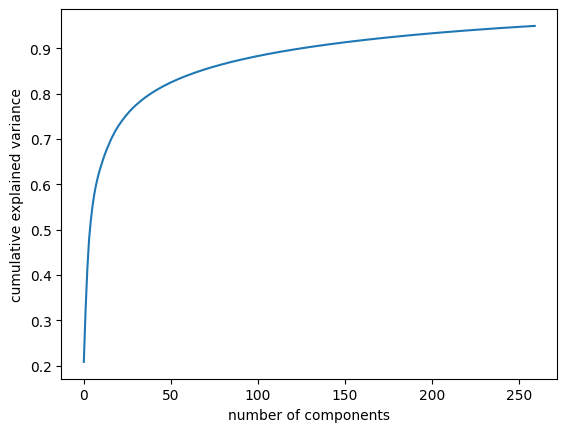

In [16]:
## Step 3: Perform PCA.

from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC


pca = PCA(n_components=260).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.show()

In [17]:
print(pca.n_components_)

260


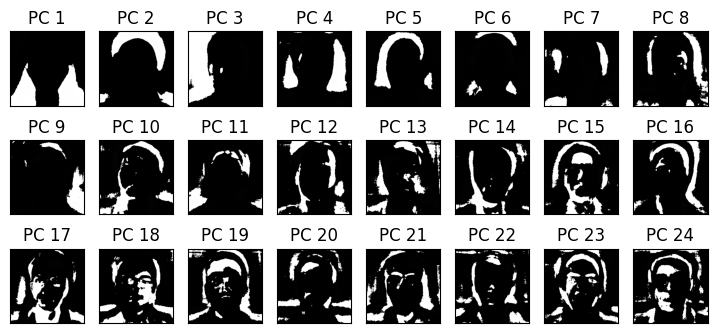

In [18]:
show_eigenfaces(pca)

In [19]:
## Step 4: Project Training data to PCA
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)

Projecting the input data on the eigenfaces orthonormal basis


In [20]:
Xtrain_pca.shape


(672, 260)

# **SVM Classifier**

In [21]:
## Step 5: Initialize Classifer and fit training data
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)

In [22]:
from time import time
from sklearn.metrics import classification_report
## Step 6: Perform testing and get classification report
print("Predicting people's names on the test set")
t0 = time()
Xtest_pca = pca.transform(x_test)
y_pred = clf.predict(Xtest_pca)
#print(y_test)
#print(y_pred)
#for i in range(len(y_test)):
 # print(y_test[i], y_pred[i])

print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

Predicting people's names on the test set
done in 0.171s
              precision    recall  f1-score   support

  IMT2012017       1.00      0.67      0.80         3
  IMT2012026       1.00      1.00      1.00         4
  IMT2012029       1.00      1.00      1.00         4
  IMT2012032       1.00      1.00      1.00         4
  IMT2012033       1.00      1.00      1.00         3
  IMT2012042       0.00      0.00      0.00         1
  IMT2012044       1.00      1.00      1.00         3
  IMT2013008       1.00      1.00      1.00         3
  IMT2013011       1.00      1.00      1.00         4
  IMT2013012       1.00      0.67      0.80         3
  IMT2013015       1.00      1.00      1.00         3
  IMT2013017       0.67      0.67      0.67         3
  IMT2013018       1.00      1.00      1.00         3
  IMT2013024       1.00      1.00      1.00         4
  IMT2013026       1.00      1.00      1.00         3
  IMT2013028       0.67      1.00      0.80         4
  IMT2013029       0.80 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# import dependencies
from keras.layers import LSTM
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time




# **ANN Classifier**

In [24]:
Xtrain_pca_ANN = pca.transform(x_train_ANN)
Xtest_pca_ANN=pca.transform(x_test_ANN)

In [25]:
print(Xtrain_pca_ANN.shape)
print(Xtest_pca_ANN.shape)

(672, 260)
(168, 260)


In [26]:
num_classes1 = y_train_ANN.shape[1]
#num_classes2 = y_train.shape[1]

print(num_classes1)
#print(num_classes2)

51


In [31]:


import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from keras import regularizers
#from keras.layers.core import Dropout
from keras.layers import LSTM


# Define the input layer
input_dim = 260  # Example: for 224x224x3 images
num_classes = y_train_ANN.shape[1]  # Number of classes

input_layer = Input(shape=(input_dim,))

# Define the hidden layers
hidden_layer_sizes = [256, 128, 64]

hidden_layer = input_layer
for layer_size in hidden_layer_sizes:
    hidden_layer = Dense(layer_size,activation='relu')(hidden_layer)

# Define the output layer for classification
output_layer = Dense(num_classes, activation='softmax')(hidden_layer)

# Create the classification model
classification_model = Model(inputs=input_layer, outputs=output_layer)

# Print a summary of the classification model
classification_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 260)]             0         
                                                                 
 dense_4 (Dense)             (None, 256)               66816     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 51)                3315      
                                                                 
Total params: 111283 (434.70 KB)
Trainable params: 111283 (434.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compile the classifier
classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Train the classifier using the encoded features and corresponding labels
classification_model.fit(Xtrain_pca_ANN, y_train_ANN, epochs=10, batch_size=2)

Epoch 1/10
336/336 [==============================] - 8s 3ms/step - loss: 2.0887 - accuracy: 0.5193
Epoch 2/10
336/336 [==============================] - 1s 3ms/step - loss: 0.1158 - accuracy: 0.9732
Epoch 3/10
336/336 [==============================] - 1s 3ms/step - loss: 0.0177 - accuracy: 0.9955
Epoch 4/10
336/336 [==============================] - 1s 3ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5/10
336/336 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/10
336/336 [==============================] - 1s 3ms/step - loss: 8.9204e-04 - accuracy: 1.0000
Epoch 7/10
336/336 [==============================] - 1s 3ms/step - loss: 6.5070e-04 - accuracy: 1.0000
Epoch 8/10
336/336 [==============================] - 1s 4ms/step - loss: 4.9063e-04 - accuracy: 1.0000
Epoch 9/10
336/336 [==============================] - 2s 4ms/step - loss: 3.7951e-04 - accuracy: 1.0000
Epoch 10/10
336/336 [==============================] - 2s 5ms/step - loss: 2.9798e-0

In [34]:
pip install scikeras

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# evaluate model with standardized dataset
estimator = KerasClassifier(model=classification_model, epochs=20, batch_size=5, verbose=0)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, Xtest_pca_ANN, y_test_ANN, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 89.29% (3.07%)


# **Execution through webcam**

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to new_photo.jpg


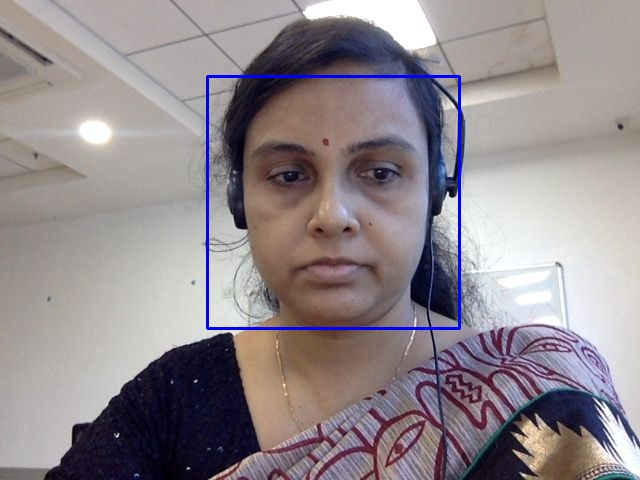

In [ ]:
try:
  filename = take_photo('new_photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
#image verification for particular image

%cd /content
z_data=[]
new_image = load_img("new_photo.jpg", target_size=image_size, color_mode = "grayscale" )
new_image = img_to_array(new_image) / 255.0  # Normalize pixel values
z_data.append(new_image)
z_data = np.array(z_data)

z_data.shape

z_data= z_data.reshape((len(z_data), np.prod(z_data.shape[1:])))
z_data.shape
z_data_pred=[]

z_data_pca = pca.transform(z_data)
z_data_pred = clf.predict(z_data_pca)

print(z_data_pred)



/content
['PH2023002']
